# Statistika Deskriptif "World Happiness Report"

**Nama**  : Difta Alzena Sakhi  
**NPM**   : 23083010061  
**Kelas** : Analisis Eksploratif Data (EDA) - A  

**Tentang Dataset**:  
Dataset Kebahagiaan Dunia (World Happiness Report) ini mengevaluasi tingkat kebahagiaan di 155 negara berdasarkan data dari Gallup World Poll. Survei ini menggunakan *Cantril ladder* untuk mengukur kebahagiaan, di mana responden diminta untuk menilai kehidupan mereka pada skala 0 (terburuk) hingga 10 (terbaik). Hasil laporan ini dimanfaatkan oleh pemerintah dan organisasi untuk memahami faktor-faktor yang mempengaruhi kesejahteraan masyarakat serta menjadi acuan dalam penyusunan kebijakan. Beberapa variabel yang diukur dalam dataset ini meliputi: 

- **Country**: Nama negara.
- **Region**: Wilayah tempat negara tersebut berada.
- **Happiness Rank**: Peringkat kebahagiaan negara.
- **Happiness Score**: Skor kebahagiaan yang diberikan berdasarkan hasil survei.
- **Economy (GDP per Capita)**: Indikator ekonomi yang mencerminkan pendapatan per kapita.
- **Family**: Faktor yang mencakup dukungan keluarga dan hubungan sosial.
- **Health (Life Expectancy)**: Indikator kesehatan masyarakat, diukur melalui harapan hidup.
- **Freedom**: Tingkat kebebasan yang dirasakan oleh individu untuk membuat pilihan hidup.
- **Trust (Government Corruption)**: Tingkat kepercayaan terhadap pemerintah dan persepsi korupsi.
- **Generosity**: Indikator kemurahan hati masyarakat, diukur dari sumbangan dan dukungan sosial. 

### Menyiapkan Data

In [59]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [60]:
# Memuat data file ke dalam DataFrame:
df_2015 = pd.read_excel(r'C:\Users\Difta Alzena\OneDrive\ドキュメント\World Happiness Report_EDA - Copy.xlsx')

# Menampilkan beberapa baris DataFrame
df_2015.head() 

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [61]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB


DataFrame yang dihasilkan memiliki 158 entri dan terdiri dari 10 kolom. Terdapat dua kolom bertipe objek yaitu "Country" dan "Region," yang berisi informasi kategorikal. Sementara itu, kolom lainnya bertipe numerik: satu kolom bertipe integer ("Happiness Rank") dan sembilan kolom bertipe float, termasuk "Happiness Score," "Economy (GDP per Capita)," "Family," "Health (Life Expectancy)," "Freedom," "Trust (Government Corruption)," dan "Generosity." Semua kolom memiliki nilai non-null, menunjukkan bahwa tidak ada data yang hilang. Penggunaan memori DataFrame ini adalah 12.5+ KB, menunjukkan bahwa dataset ini relatif kecil dan mudah untuk diolah dalam analisis lebih lanjut.

### 1. Visualisasi Data dan Kategori Distribusinya

**a. Country dan Region**

Distribusi pertama yang akan saya analisis adalah count plot dari *Country* dan *Region*. Dikarenakan data yang digunakan bersifat kategorikal, count plot ini akan menunjukkan jumlah negara yang termasuk dalam masing-masing region. Analisis ini penting untuk memahami variasi dan pola regional dalam data kebahagiaan global.

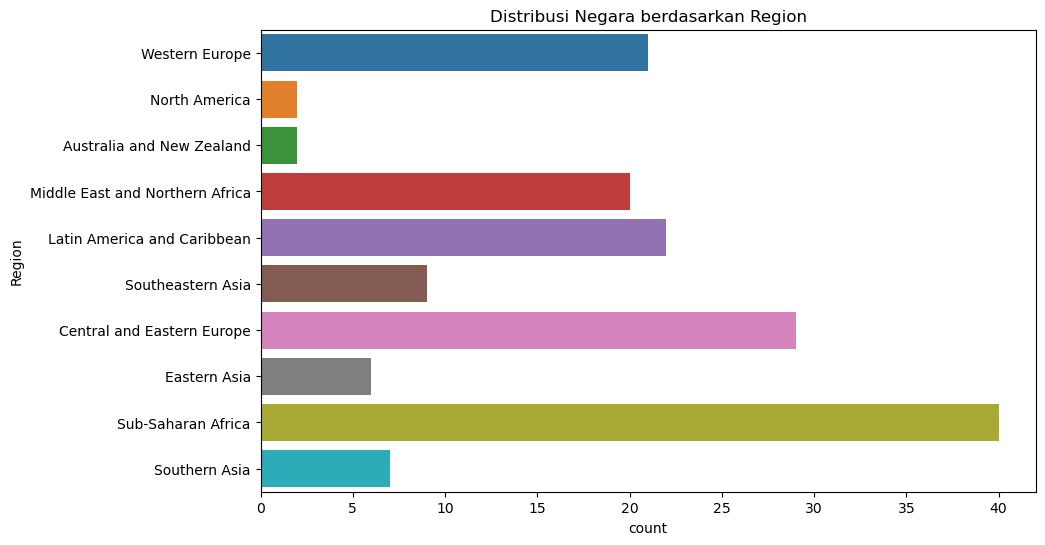

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(y=df_2015['Region'])
plt.title('Distribusi Negara berdasarkan Region')
plt.show()

Count plot yang saya buat menggunakan `sns.countplot()` untuk menunjukkan jumlah negara berdasarkan *Region* termasuk dalam kategori distribusi **Diskrit**. Saya melihat bahwa distribusi diskrit ini melibatkan variabel yang hanya bisa mengambil nilai tertentu, seperti jumlah negara dalam kategori region yang terpisah. Dengan count plot ini, saya bisa memahami seberapa banyak negara yang ada di setiap region, seperti pada *Western Europe* atau *Southern Asia*. Ini membantu saya mengidentifikasi region yang memiliki jumlah negara terbanyak atau sedikit dan memberikan wawasan tentang keberagaman geografis.

**b. Happiness Score**

Distribusi selanjutnya adalah *Happiness Score*, yang menggambarkan seberapa bahagianya individu dalam populasi yang saya teliti. Skor ini berasal dari berbagai faktor yang mempengaruhi kesejahteraan psikologis, seperti pendapatan, dukungan sosial, kesehatan, kebebasan, kepercayaan terhadap pemerintah, dan kemurahan hati. 

Dengan melihat distribusi *Happiness Score*, kita bisa memahami bagaimana tingkat kebahagiaan ini tersebar di antara orang-orang di berbagai negara. Kita juga bisa mengidentifikasi tren dan pola yang muncul. Analisis ini sangat berguna untuk memberikan gambaran tentang kesejahteraan secara keseluruhan di berbagai negara.

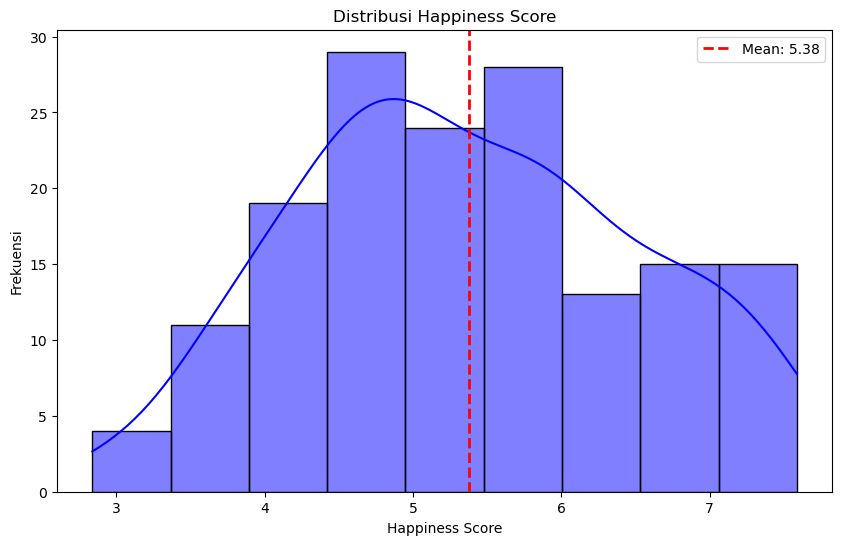

In [63]:
# Membuat plot untuk kolom 'Happiness Score'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Happiness Score'], kde=True, color='blue')

# Menambahkan garis rata-rata
mean_happiness = df_2015['Happiness Score'].mean()
plt.axvline(mean_happiness, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_happiness:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frekuensi')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan histogram, terlihat puncak yang jelas di sekitar nilai 5, yang mengindikasikan bahwa sebagian besar individu memiliki tingkat kebahagiaan yang cukup tinggi. Rata-rata yang tercatat yaitu 5.38 semakin memperkuat bahwa banyak individu merasa bahagia di sekitar nilai tersebut, dengan sebaran data yang relatif merata di kedua sisi puncak. Ini menunjukkan bahwa kebahagiaan tidak hanya dialami oleh segelintir orang, tetapi lebih banyak individu yang merasakan tingkat kebahagiaan yang serupa. Dengan demikian, kita dapat menyimpulkan bahwa sebagian besar populasi cenderung berada pada tingkat kebahagiaan yang baik, mencerminkan kesejahteraan psikologis secara keseluruhan.

Selain itu, dari gambar terlihat bahwa data condong sedikit lebih banyak ke arah kanan, yakni ke nilai yang lebih tinggi. Ini berarti terdapat lebih banyak individu yang memiliki skor kebahagiaan di atas rata-rata, meskipun tidak terlalu signifikan. Ini memberikan gambaran positif tentang kesejahteraan individu dalam populasi yang dianalisis.

Normal Log-likelihood: -245.08603043538508
Gamma Log-likelihood: -244.84967273447853
Exponential Log-likelihood: -305.0786444839417
Weibull Log-likelihood: -243.14377873051336
Log-Normal Log-likelihood: -244.85032182739184
Bimodal Log-likelihood: -688.1468488805923
Poisson Log-likelihood: -inf
Beta Log-likelihood: 7.696929872223707
Normal AIC: 494.17206087077017
Gamma AIC: 495.69934546895706
Exponential AIC: 614.1572889678833
Weibull AIC: 492.2875574610267
Log-Normal AIC: 495.7006436547837
Bimodal AIC: 1384.2936977611846
Poisson AIC: inf
Beta AIC: -7.393859744447415


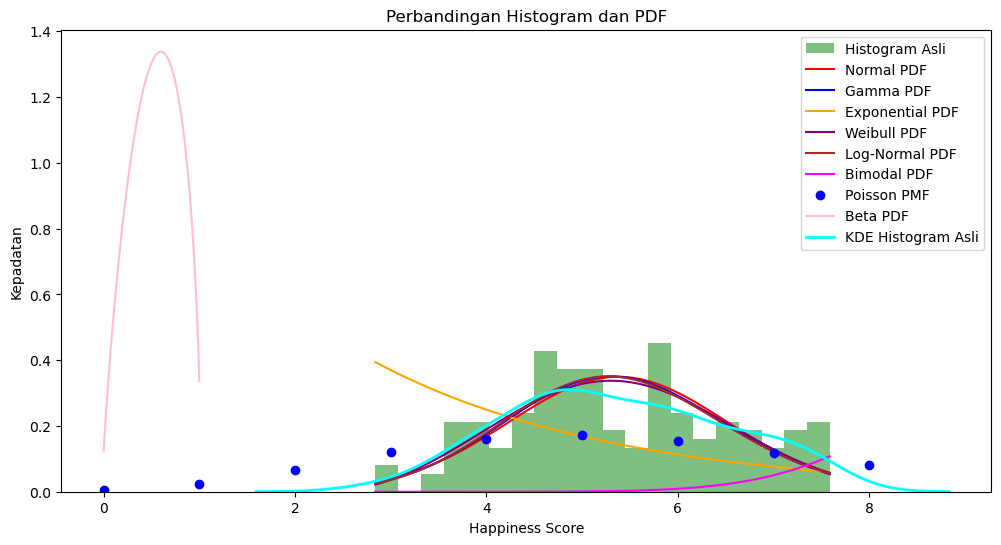

In [72]:
# Definisikan data dari kolom 'Happiness Score'
data = df_2015['Happiness Score'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan parameter untuk distribusi bimodal
mean1, std1, weight1 = 2.5, 0.5, 0.5  # Distribusi pertama
mean2, std2, weight2 = 4.5, 0.5, 0.5  # Distribusi kedua

# 7. Fit Distribusi Poisson
lambda_poisson = np.mean(data)  # Rata-rata sebagai parameter λ
poisson_params = (lambda_poisson,)

# 8. Fit Distribusi Beta
# Pastikan data diubah ke dalam rentang [0, 1] untuk Beta
data_beta = (data - min(data)) / (max(data) - min(data))  # Normalisasi ke [0, 1]
beta_params = stats.beta.fit(data_beta)

# 9. Hitung Log-likelihood untuk Distribusi Normal
norm_loglikelihood = np.sum(stats.norm.logpdf(data, *norm_params))

# 10. Hitung Log-likelihood untuk Distribusi Gamma
gamma_loglikelihood = np.sum(stats.gamma.logpdf(data, *gamma_params))

# 11. Hitung Log-likelihood untuk Distribusi Exponential
exp_loglikelihood = np.sum(stats.expon.logpdf(data, *exp_params))

# 12. Hitung Log-likelihood untuk distribusi Weibull
weibull_loglikelihood = np.sum(stats.weibull_min.logpdf(data, *weibull_params))

# 13. Hitung Log-likelihood untuk distribusi Log-Normal
lognorm_loglikelihood = np.sum(stats.lognorm.logpdf(data, *lognorm_params))

# 14. Hitung Log-likelihood untuk distribusi bimodal
bimodal_pdf = (weight1 * stats.norm.pdf(x, mean1, std1) +
                weight2 * stats.norm.pdf(x, mean2, std2))
bimodal_loglikelihood = np.sum(np.log(bimodal_pdf + 1e-10))  # Menghindari log(0)

# 15. Hitung Log-likelihood untuk distribusi Poisson
poisson_loglikelihood = np.sum(stats.poisson.logpmf(data, lambda_poisson))

# 16. Hitung Log-likelihood untuk distribusi Beta
beta_loglikelihood = np.sum(stats.beta.logpdf(data_beta, *beta_params))

# 17. Definisikan Fungsi untuk Menghitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# 18. Hitung AIC untuk Distribusi Normal
norm_aic = calculate_aic(norm_loglikelihood, len(norm_params))

# 19. Hitung AIC untuk Distribusi Gamma
gamma_aic = calculate_aic(gamma_loglikelihood, len(gamma_params))

# 20. Hitung AIC untuk Distribusi Exponential
exp_aic = calculate_aic(exp_loglikelihood, len(exp_params))

# 21. Hitung AIC untuk Distribusi Weibull
weibull_aic = calculate_aic(weibull_loglikelihood, len(weibull_params))

# 22. Hitung AIC untuk Distribusi Log-Normal
lognorm_aic = calculate_aic(lognorm_loglikelihood, len(lognorm_params))

# 23. Hitung AIC untuk distribusi bimodal
bimodal_aic = calculate_aic(bimodal_loglikelihood, 4)  # 4 parameter (mean1, std1, mean2, std2)

# 24. Hitung AIC untuk distribusi Poisson
poisson_aic = calculate_aic(poisson_loglikelihood, 1)  # 1 parameter (λ)

# 25. Hitung AIC untuk distribusi Beta
beta_aic = calculate_aic(beta_loglikelihood, len(beta_params))

# 26. Tampilkan Hasil
print(f"Normal Log-likelihood: {norm_loglikelihood}")
print(f"Gamma Log-likelihood: {gamma_loglikelihood}")
print(f"Exponential Log-likelihood: {exp_loglikelihood}")
print(f"Weibull Log-likelihood: {weibull_loglikelihood}")
print(f"Log-Normal Log-likelihood: {lognorm_loglikelihood}")
print(f"Bimodal Log-likelihood: {bimodal_loglikelihood}")
print(f"Poisson Log-likelihood: {poisson_loglikelihood}")
print(f"Beta Log-likelihood: {beta_loglikelihood}")

print(f"Normal AIC: {norm_aic}")
print(f"Gamma AIC: {gamma_aic}")
print(f"Exponential AIC: {exp_aic}")
print(f"Weibull AIC: {weibull_aic}")
print(f"Log-Normal AIC: {lognorm_aic}")
print(f"Bimodal AIC: {bimodal_aic}")
print(f"Poisson AIC: {poisson_aic}")
print(f"Beta AIC: {beta_aic}")

# 27. Visualisasi PDF
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=20, density=True, alpha=0.5, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi normal
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')

# Plot PDF untuk distribusi gamma
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')

# Plot PDF untuk distribusi Exponential
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')

# Plot PDF untuk distribusi Weibull
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')

# Plot PDF untuk distribusi Log-Normal
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot PDF untuk distribusi bimodal
plt.plot(x, bimodal_pdf, 'magenta', label='Bimodal PDF')

# Plot PDF untuk distribusi Poisson
x_poisson = np.arange(0, max(data)+1)  # Rentang untuk distribusi Poisson
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'blue', marker='o', linestyle='None', label='Poisson PMF')

# Plot PDF untuk distribusi Beta
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, stats.beta.pdf(x_beta, *beta_params), 'pink', label='Beta PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Happiness Score')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Berdasarkan hasil log-likelihood dan AIC yang diperoleh dari analisis distribusi pada data *Happiness Score*, distribusi **Weibull** memiliki nilai AIC terendah (492.29), menunjukkan bahwa ia paling sesuai dengan data dibandingkan dengan distribusi lainnya. Log-likelihood untuk distribusi Weibull juga menunjukkan nilai yang lebih baik (-243.14) dibandingkan dengan distribusi normal dan gamma. Sebaliknya, distribusi bimodal menunjukkan performa terburuk dengan AIC yang sangat tinggi (1074.77) dan log-likelihood yang rendah (-533.38), menandakan bahwa model ini tidak cocok untuk menggambarkan data. Distribusi Poisson mengalami masalah dengan nilai log-likelihood yang tidak terhingga (-inf), menunjukkan ketidakcocokan yang signifikan. Secara keseluruhan, distribusi Weibull merupakan pilihan terbaik untuk memodelkan *Happiness Score* dalam dataset ini.

#### Lalu, selanjutnya kita akan melihat visualisasi data dan kategori distribusi dari faktor-faktor yang mempengaruhi happiness score:

**c. Economy (GDP per Capita)**

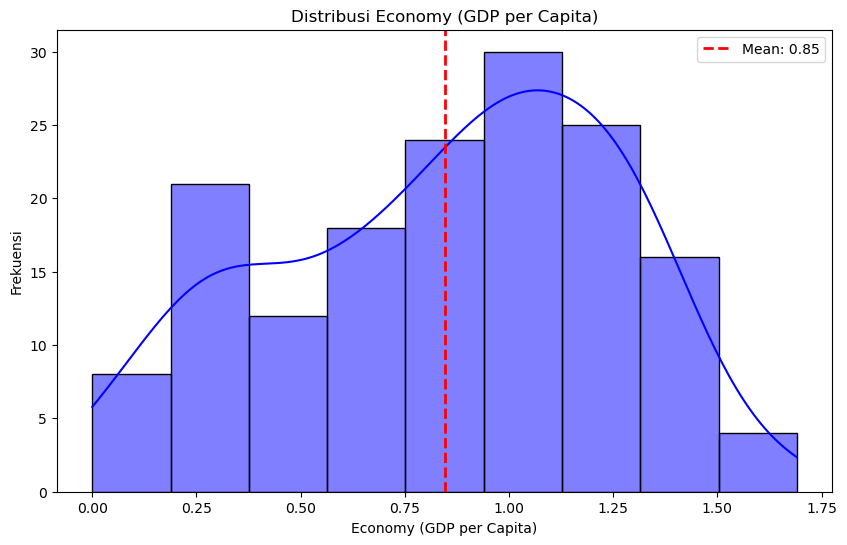

In [65]:
# Membuat plot untuk kolom 'Economy (GDP per Capita)'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Economy (GDP per Capita)'], kde=True, color='blue')

# Menambahkan garis rata-rata
mean_economy = df_2015['Economy (GDP per Capita)'].mean()
plt.axvline(mean_economy, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_economy:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frekuensi')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Distribusi data *Economy (GDP per Capita)* menunjukkan puncak yang terletak sedikit di atas 1 dan rata-rata di sekitar 0,85. Meskipun puncaknya dekat dengan 1, sebagian besar nilai cenderung berada di bawah angka tersebut, yang mengindikasikan konsentrasi data pada nilai rendah hingga menengah. Bagian kiri menuju puncak terlihat bergelombang, mencerminkan variasi di antara nilai-nilai rendah, sementara puncak ke kanan menurun dengan tajam, menunjukkan bahwa hanya sedikit negara yang memiliki *GDP per Capita* yang sangat tinggi. Hal ini menggambarkan ketidakmerataan dalam distribusi kekayaan di berbagai negara, yang penting untuk dipertimbangkan dalam analisis lebih lanjut.

Normal Log-likelihood: -80.14468725344611
Gamma Log-likelihood: -81.24681696288339
Exponential Log-likelihood: -131.60234913815538
Weibull Log-likelihood: -76.51222934594249
Log-Normal Log-likelihood: -80.26137275757935
Bimodal Log-likelihood: -772.5236231954485
Poisson Log-likelihood: -inf
Beta Log-likelihood: 10.550852177826098
Normal AIC: 164.28937450689222
Gamma AIC: 168.49363392576677
Exponential AIC: 267.20469827631075
Weibull AIC: 159.02445869188497
Log-Normal AIC: 166.5227455151587
Bimodal AIC: 1553.047246390897
Poisson AIC: inf
Beta AIC: -13.101704355652195


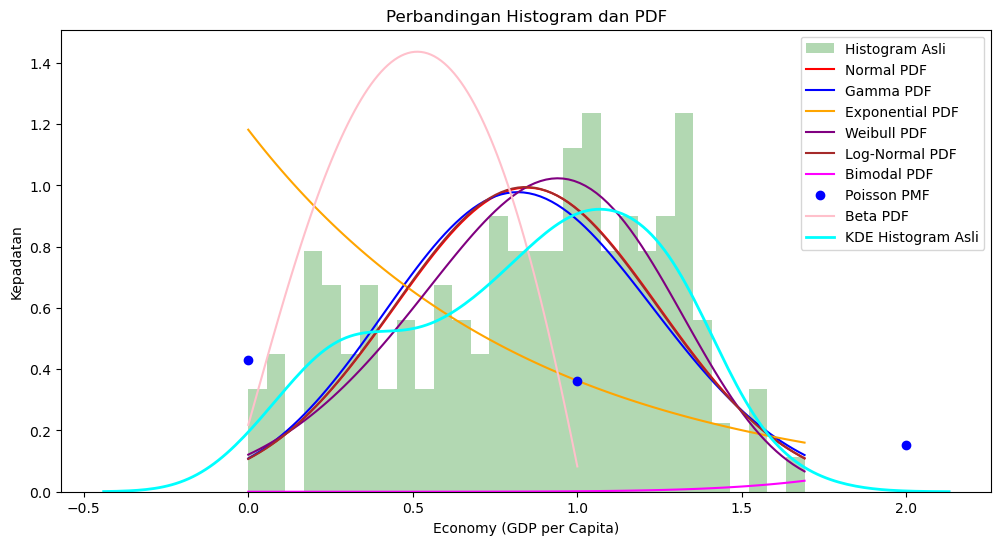

In [71]:
# Definisikan data dari kolom 'Economy (GDP per Capita)'
data = df_2015['Economy (GDP per Capita)'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan parameter untuk distribusi bimodal
mean1, std1, weight1 = 2.5, 0.5, 0.5  # Distribusi pertama
mean2, std2, weight2 = 4.5, 0.5, 0.5  # Distribusi kedua

# 7. Fit Distribusi Poisson
lambda_poisson = np.mean(data)  # Rata-rata sebagai parameter λ
poisson_params = (lambda_poisson,)

# 8. Fit Distribusi Beta
# Pastikan data diubah ke dalam rentang [0, 1] untuk Beta
data_beta = (data - min(data)) / (max(data) - min(data))  # Normalisasi ke [0, 1]
beta_params = stats.beta.fit(data_beta)

# 9. Hitung Log-likelihood untuk Distribusi Normal
norm_loglikelihood = np.sum(stats.norm.logpdf(data, *norm_params))

# 10. Hitung Log-likelihood untuk Distribusi Gamma
gamma_loglikelihood = np.sum(stats.gamma.logpdf(data, *gamma_params))

# 11. Hitung Log-likelihood untuk Distribusi Exponential
exp_loglikelihood = np.sum(stats.expon.logpdf(data, *exp_params))

# 12. Hitung Log-likelihood untuk distribusi Weibull
weibull_loglikelihood = np.sum(stats.weibull_min.logpdf(data, *weibull_params))

# 13. Hitung Log-likelihood untuk distribusi Log-Normal
lognorm_loglikelihood = np.sum(stats.lognorm.logpdf(data, *lognorm_params))

# 14. Hitung Log-likelihood untuk distribusi bimodal
bimodal_pdf = (weight1 * stats.norm.pdf(x, mean1, std1) +
                weight2 * stats.norm.pdf(x, mean2, std2))
bimodal_loglikelihood = np.sum(np.log(bimodal_pdf + 1e-10))  # Menghindari log(0)

# 15. Hitung Log-likelihood untuk distribusi Poisson
poisson_loglikelihood = np.sum(stats.poisson.logpmf(data, lambda_poisson))

# 16. Hitung Log-likelihood untuk distribusi Beta
beta_loglikelihood = np.sum(stats.beta.logpdf(data_beta, *beta_params))

# 17. Definisikan Fungsi untuk Menghitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# 18. Hitung AIC untuk Distribusi Normal
norm_aic = calculate_aic(norm_loglikelihood, len(norm_params))

# 19. Hitung AIC untuk Distribusi Gamma
gamma_aic = calculate_aic(gamma_loglikelihood, len(gamma_params))

# 20. Hitung AIC untuk Distribusi Exponential
exp_aic = calculate_aic(exp_loglikelihood, len(exp_params))

# 21. Hitung AIC untuk Distribusi Weibull
weibull_aic = calculate_aic(weibull_loglikelihood, len(weibull_params))

# 22. Hitung AIC untuk Distribusi Log-Normal
lognorm_aic = calculate_aic(lognorm_loglikelihood, len(lognorm_params))

# 23. Hitung AIC untuk distribusi bimodal
bimodal_aic = calculate_aic(bimodal_loglikelihood, 4)  # 4 parameter (mean1, std1, mean2, std2)

# 24. Hitung AIC untuk distribusi Poisson
poisson_aic = calculate_aic(poisson_loglikelihood, 1)  # 1 parameter (λ)

# 25. Hitung AIC untuk distribusi Beta
beta_aic = calculate_aic(beta_loglikelihood, len(beta_params))

# 26. Tampilkan Hasil
print(f"Normal Log-likelihood: {norm_loglikelihood}")
print(f"Gamma Log-likelihood: {gamma_loglikelihood}")
print(f"Exponential Log-likelihood: {exp_loglikelihood}")
print(f"Weibull Log-likelihood: {weibull_loglikelihood}")
print(f"Log-Normal Log-likelihood: {lognorm_loglikelihood}")
print(f"Bimodal Log-likelihood: {bimodal_loglikelihood}")
print(f"Poisson Log-likelihood: {poisson_loglikelihood}")
print(f"Beta Log-likelihood: {beta_loglikelihood}")

print(f"Normal AIC: {norm_aic}")
print(f"Gamma AIC: {gamma_aic}")
print(f"Exponential AIC: {exp_aic}")
print(f"Weibull AIC: {weibull_aic}")
print(f"Log-Normal AIC: {lognorm_aic}")
print(f"Bimodal AIC: {bimodal_aic}")
print(f"Poisson AIC: {poisson_aic}")
print(f"Beta AIC: {beta_aic}")

# 27. Visualisasi PDF
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.3, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi normal
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')

# Plot PDF untuk distribusi gamma
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')

# Plot PDF untuk distribusi Exponential
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')

# Plot PDF untuk distribusi Weibull
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')

# Plot PDF untuk distribusi Log-Normal
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot PDF untuk distribusi bimodal
plt.plot(x, bimodal_pdf, 'magenta', label='Bimodal PDF')

# Plot PDF untuk distribusi Poisson
x_poisson = np.arange(0, max(data)+1)  # Rentang untuk distribusi Poisson
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'blue', marker='o', linestyle='None', label='Poisson PMF')

# Plot PDF untuk distribusi Beta
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, stats.beta.pdf(x_beta, *beta_params), 'pink', label='Beta PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Dari hasil log-likelihood dan AIC untuk variabel *Economy (GDP per Capita)*, distribusi **Weibull** memiliki log-likelihood tertinggi (-76.51) dan AIC terendah (159.02), yang menunjukkan bahwa model ini paling sesuai dengan data. Distribusi Normal dan Log-Normal memiliki log-likelihood yang relatif dekat tetapi AIC mereka lebih tinggi, menunjukkan bahwa meskipun mereka juga bisa cocok, Weibull adalah pilihan terbaik dalam hal kecocokan model. Distribusi Gamma dan Exponential menunjukkan kinerja yang lebih buruk, sedangkan bimodal dan Poisson tidak berhasil dengan baik, dengan bimodal menunjukkan log-likelihood yang sangat rendah dan AIC yang sangat tinggi. Beta memiliki log-likelihood positif, tetapi AIC-nya juga lebih tinggi dibandingkan Weibull. Oleh karena itu, model Weibull dapat dianggap sebagai model terbaik untuk memodelkan variabel ekonomi dalam dataset ini.

**d. Family**

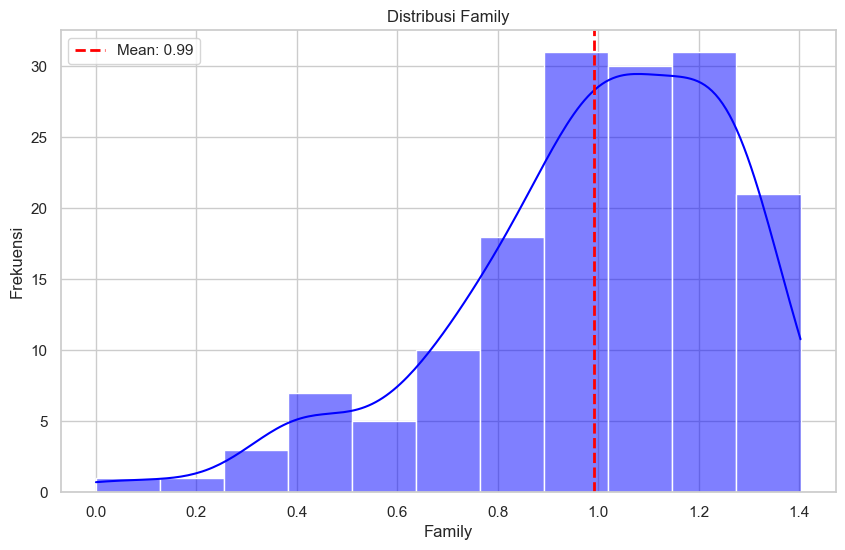

In [36]:
# Membuat plot untuk kolom 'Family'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Family'], kde=True, color='blue')

# Menambahkan garis rata-rata
mean_family = df_2015['Family'].mean()
plt.axvline(mean_family, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_family:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Family')
plt.xlabel('Family')
plt.ylabel('Frekuensi')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan histogram distribusi *Family*, kita dapat melihat bahwa nilai rata-rata (mean) berada di sekitar 1,0. Namun, puncak distribusi tidak terlalu jelas, karena frekuensi nilai antara 0,9 hingga 1,3 tampak cukup seragam. Meski demikian, tampaknya puncaknya berada di sekitar 1,1, meskipun kita tidak bisa terlalu yakin akan hal ini. 

Ketika menganalisis sisi kiri histogram menuju puncak, terlihat bahwa distribusi ini mengalami peningkatan yang baik, meskipun ada pola bergelombang pada titik-titik di 0,4 dan 0,5 yang menunjukkan variasi dalam nilai keluarga. Setelah melewati titik-titik tersebut, frekuensi terus meningkat hingga mencapai puncak. 

Di sisi kanan puncak, distribusi menunjukkan penurunan yang cukup baik hingga titik akhir di sekitar 1,4, menunjukkan bahwa nilai-nilai keluarga yang sangat tinggi tidak umum. Secara keseluruhan, meskipun tidak ada puncak yang sangat jelas, analisis ini memberikan gambaran bahwa data keluarga terdistribusi dengan baik dengan frekuensi yang menurun setelah puncak.

C:\Users\Difta Alzena\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Normal Log-likelihood: -18.19634187519366
Gamma Log-likelihood: -21.49100026660794
Exponential Log-likelihood: -156.57888810852674
Weibull Log-likelihood: -1.6823370531932085
Log-Normal Log-likelihood: -18.340409889811113
Bimodal Log-likelihood: -772.5236231954485
Poisson Log-likelihood: -inf
Beta Log-likelihood: 56.17008862721845
Normal AIC: 40.39268375038732
Gamma AIC: 48.98200053321588
Exponential AIC: 317.1577762170535
Weibull AIC: 9.364674106386417
Log-Normal AIC: 42.680819779622226
Bimodal AIC: 1553.047246390897
Poisson AIC: inf
Beta AIC: -104.3401772544369


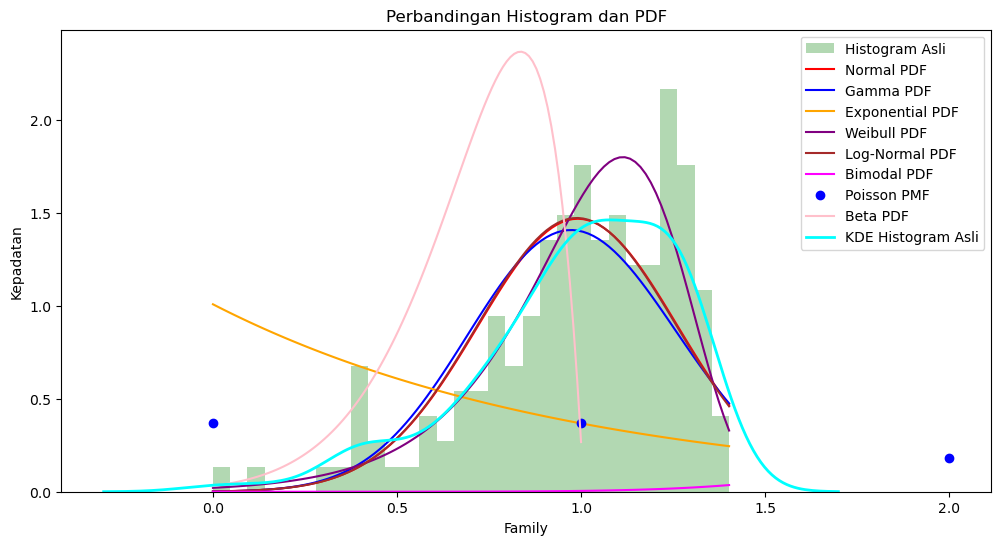

In [70]:
# Definisikan data dari kolom 'Family'
data = df_2015['Family'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan parameter untuk distribusi bimodal
mean1, std1, weight1 = 2.5, 0.5, 0.5  # Distribusi pertama
mean2, std2, weight2 = 4.5, 0.5, 0.5  # Distribusi kedua

# 7. Fit Distribusi Poisson
lambda_poisson = np.mean(data)  # Rata-rata sebagai parameter λ
poisson_params = (lambda_poisson,)

# 8. Fit Distribusi Beta
# Pastikan data diubah ke dalam rentang [0, 1] untuk Beta
data_beta = (data - min(data)) / (max(data) - min(data))  # Normalisasi ke [0, 1]
beta_params = stats.beta.fit(data_beta)

# 9. Hitung Log-likelihood untuk Distribusi Normal
norm_loglikelihood = np.sum(stats.norm.logpdf(data, *norm_params))

# 10. Hitung Log-likelihood untuk Distribusi Gamma
gamma_loglikelihood = np.sum(stats.gamma.logpdf(data, *gamma_params))

# 11. Hitung Log-likelihood untuk Distribusi Exponential
exp_loglikelihood = np.sum(stats.expon.logpdf(data, *exp_params))

# 12. Hitung Log-likelihood untuk distribusi Weibull
weibull_loglikelihood = np.sum(stats.weibull_min.logpdf(data, *weibull_params))

# 13. Hitung Log-likelihood untuk distribusi Log-Normal
lognorm_loglikelihood = np.sum(stats.lognorm.logpdf(data, *lognorm_params))

# 14. Hitung Log-likelihood untuk distribusi bimodal
bimodal_pdf = (weight1 * stats.norm.pdf(x, mean1, std1) +
                weight2 * stats.norm.pdf(x, mean2, std2))
bimodal_loglikelihood = np.sum(np.log(bimodal_pdf + 1e-10))  # Menghindari log(0)

# 15. Hitung Log-likelihood untuk distribusi Poisson
poisson_loglikelihood = np.sum(stats.poisson.logpmf(data, lambda_poisson))

# 16. Hitung Log-likelihood untuk distribusi Beta
beta_loglikelihood = np.sum(stats.beta.logpdf(data_beta, *beta_params))

# 17. Definisikan Fungsi untuk Menghitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# 18. Hitung AIC untuk Distribusi Normal
norm_aic = calculate_aic(norm_loglikelihood, len(norm_params))

# 19. Hitung AIC untuk Distribusi Gamma
gamma_aic = calculate_aic(gamma_loglikelihood, len(gamma_params))

# 20. Hitung AIC untuk Distribusi Exponential
exp_aic = calculate_aic(exp_loglikelihood, len(exp_params))

# 21. Hitung AIC untuk Distribusi Weibull
weibull_aic = calculate_aic(weibull_loglikelihood, len(weibull_params))

# 22. Hitung AIC untuk Distribusi Log-Normal
lognorm_aic = calculate_aic(lognorm_loglikelihood, len(lognorm_params))

# 23. Hitung AIC untuk distribusi bimodal
bimodal_aic = calculate_aic(bimodal_loglikelihood, 4)  # 4 parameter (mean1, std1, mean2, std2)

# 24. Hitung AIC untuk distribusi Poisson
poisson_aic = calculate_aic(poisson_loglikelihood, 1)  # 1 parameter (λ)

# 25. Hitung AIC untuk distribusi Beta
beta_aic = calculate_aic(beta_loglikelihood, len(beta_params))

# 26. Tampilkan Hasil
print(f"Normal Log-likelihood: {norm_loglikelihood}")
print(f"Gamma Log-likelihood: {gamma_loglikelihood}")
print(f"Exponential Log-likelihood: {exp_loglikelihood}")
print(f"Weibull Log-likelihood: {weibull_loglikelihood}")
print(f"Log-Normal Log-likelihood: {lognorm_loglikelihood}")
print(f"Bimodal Log-likelihood: {bimodal_loglikelihood}")
print(f"Poisson Log-likelihood: {poisson_loglikelihood}")
print(f"Beta Log-likelihood: {beta_loglikelihood}")

print(f"Normal AIC: {norm_aic}")
print(f"Gamma AIC: {gamma_aic}")
print(f"Exponential AIC: {exp_aic}")
print(f"Weibull AIC: {weibull_aic}")
print(f"Log-Normal AIC: {lognorm_aic}")
print(f"Bimodal AIC: {bimodal_aic}")
print(f"Poisson AIC: {poisson_aic}")
print(f"Beta AIC: {beta_aic}")

# 27. Visualisasi PDF
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.3, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi normal
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')

# Plot PDF untuk distribusi gamma
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')

# Plot PDF untuk distribusi Exponential
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')

# Plot PDF untuk distribusi Weibull
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')

# Plot PDF untuk distribusi Log-Normal
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot PDF untuk distribusi bimodal
plt.plot(x, bimodal_pdf, 'magenta', label='Bimodal PDF')

# Plot PDF untuk distribusi Poisson
x_poisson = np.arange(0, max(data)+1)  # Rentang untuk distribusi Poisson
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'blue', marker='o', linestyle='None', label='Poisson PMF')

# Plot PDF untuk distribusi Beta
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, stats.beta.pdf(x_beta, *beta_params), 'pink', label='Beta PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Family')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Dari hasil analisis log-likelihood dan AIC yang ditunjukkan, diketahui bahwa distribusi keluarga (*Family*) mengikuti distribusi **Weibull**. Hal ini terlihat dari nilai log-likelihood tertinggi yang dicapai oleh distribusi Weibull (-1.68), serta nilai AIC terendah (9.36) dibandingkan dengan distribusi lainnya. Nilai AIC yang lebih rendah menunjukkan model yang lebih baik dalam menjelaskan variasi data sehingga distribusi Weibull dianggap paling sesuai untuk data ini. Penggunaan distribusi Weibull mencerminkan adanya variasasi dalam tingkat kebahagiaan di dalam keluarga.

**e. Health (Life Expectancy)**

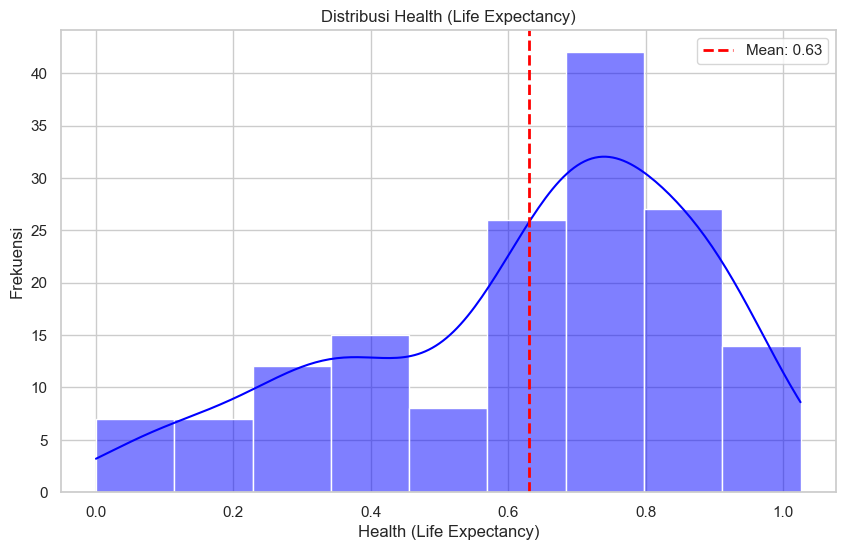

In [31]:
# Membuat plot untuk kolom 'Health (Life Expectancy)'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Health (Life Expectancy)'], kde=True, color='blue')

# Menambahkan judul dan label
plt.title('Distribusi Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frekuensi')

# Menambahkan garis rata-rata
mean_health = df_2015['Health (Life Expectancy)'].mean()
plt.axvline(mean_health, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_health:.2f}')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan histogram distribusi *Health (Life Expectancy)* yang ditampilkan, kita dapat menyimpulkan bahwa nilai mean berada di 0,63, sementara puncak distribusi terjadi di sekitar 0,7, menunjukkan bahwa meskipun rata-rata umur harapan hidup sedikit lebih rendah dari puncak distribusi, sebagian besar data terkonsentrasi di dekat nilai yang lebih tinggi. Sisi kiri histogram menunjukkan pola bergelombang, yang mencerminkan adanya variasi nilai dengan beberapa negara memiliki harapan hidup yang lebih rendah, tetapi tetap dalam rentang yang relatif dekat dengan puncak. Di sisi kanan, histogram menunjukkan penurunan yang cukup baik, mengindikasikan bahwa nilai harapan hidup yang sangat tinggi kurang umum, dengan frekuensi yang menurun setelah puncak distribusi. 

Normal Log-likelihood: -2.7984597843546943
Gamma Log-likelihood: -5.241176534541921
Exponential Log-likelihood: -85.06343161661476
Weibull Log-likelihood: 9.363922821830496
Log-Normal Log-likelihood: -2.9215324123183155
Bimodal Log-likelihood: -899.697895807227
Poisson Log-likelihood: -inf
Beta Log-likelihood: 18.005885261528654
Normal AIC: 9.596919568709389
Gamma AIC: 16.482353069083842
Exponential AIC: 174.12686323322953
Weibull AIC: -12.727845643660991
Log-Normal AIC: 11.843064824636631
Bimodal AIC: 1807.395791614454
Poisson AIC: inf
Beta AIC: -28.011770523057308


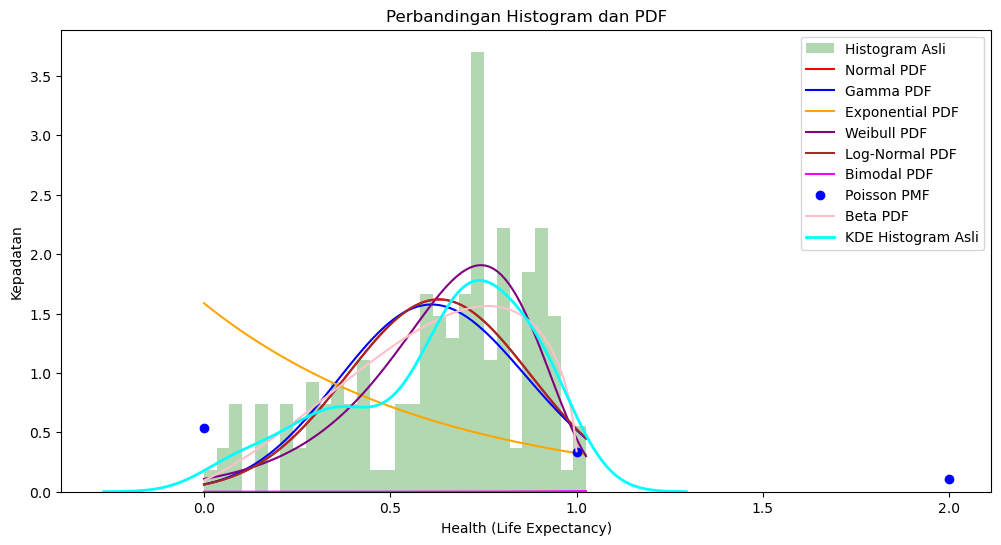

In [75]:
# Definisikan data dari kolom 'Health (Life Expectancy)'
data = df_2015['Health (Life Expectancy)'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan parameter untuk distribusi bimodal
mean1, std1, weight1 = 2.5, 0.5, 0.5  # Distribusi pertama
mean2, std2, weight2 = 4.5, 0.5, 0.5  # Distribusi kedua

# 7. Fit Distribusi Poisson
lambda_poisson = np.mean(data)  # Rata-rata sebagai parameter λ
poisson_params = (lambda_poisson,)

# 8. Fit Distribusi Beta
# Pastikan data diubah ke dalam rentang [0, 1] untuk Beta
data_beta = (data - min(data)) / (max(data) - min(data))  # Normalisasi ke [0, 1]
beta_params = stats.beta.fit(data_beta)

# 9. Hitung Log-likelihood untuk Distribusi Normal
norm_loglikelihood = np.sum(stats.norm.logpdf(data, *norm_params))

# 10. Hitung Log-likelihood untuk Distribusi Gamma
gamma_loglikelihood = np.sum(stats.gamma.logpdf(data, *gamma_params))

# 11. Hitung Log-likelihood untuk Distribusi Exponential
exp_loglikelihood = np.sum(stats.expon.logpdf(data, *exp_params))

# 12. Hitung Log-likelihood untuk distribusi Weibull
weibull_loglikelihood = np.sum(stats.weibull_min.logpdf(data, *weibull_params))

# 13. Hitung Log-likelihood untuk distribusi Log-Normal
lognorm_loglikelihood = np.sum(stats.lognorm.logpdf(data, *lognorm_params))

# 14. Hitung Log-likelihood untuk distribusi bimodal
bimodal_pdf = (weight1 * stats.norm.pdf(x, mean1, std1) +
                weight2 * stats.norm.pdf(x, mean2, std2))
bimodal_loglikelihood = np.sum(np.log(bimodal_pdf + 1e-10))  # Menghindari log(0)

# 15. Hitung Log-likelihood untuk distribusi Poisson
poisson_loglikelihood = np.sum(stats.poisson.logpmf(data, lambda_poisson))

# 16. Hitung Log-likelihood untuk distribusi Beta
beta_loglikelihood = np.sum(stats.beta.logpdf(data_beta, *beta_params))

# 17. Definisikan Fungsi untuk Menghitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# 18. Hitung AIC untuk Distribusi Normal
norm_aic = calculate_aic(norm_loglikelihood, len(norm_params))

# 19. Hitung AIC untuk Distribusi Gamma
gamma_aic = calculate_aic(gamma_loglikelihood, len(gamma_params))

# 20. Hitung AIC untuk Distribusi Exponential
exp_aic = calculate_aic(exp_loglikelihood, len(exp_params))

# 21. Hitung AIC untuk Distribusi Weibull
weibull_aic = calculate_aic(weibull_loglikelihood, len(weibull_params))

# 22. Hitung AIC untuk Distribusi Log-Normal
lognorm_aic = calculate_aic(lognorm_loglikelihood, len(lognorm_params))

# 23. Hitung AIC untuk distribusi bimodal
bimodal_aic = calculate_aic(bimodal_loglikelihood, 4)  # 4 parameter (mean1, std1, mean2, std2)

# 24. Hitung AIC untuk distribusi Poisson
poisson_aic = calculate_aic(poisson_loglikelihood, 1)  # 1 parameter (λ)

# 25. Hitung AIC untuk distribusi Beta
beta_aic = calculate_aic(beta_loglikelihood, len(beta_params))

# 26. Tampilkan Hasil
print(f"Normal Log-likelihood: {norm_loglikelihood}")
print(f"Gamma Log-likelihood: {gamma_loglikelihood}")
print(f"Exponential Log-likelihood: {exp_loglikelihood}")
print(f"Weibull Log-likelihood: {weibull_loglikelihood}")
print(f"Log-Normal Log-likelihood: {lognorm_loglikelihood}")
print(f"Bimodal Log-likelihood: {bimodal_loglikelihood}")
print(f"Poisson Log-likelihood: {poisson_loglikelihood}")
print(f"Beta Log-likelihood: {beta_loglikelihood}")

print(f"Normal AIC: {norm_aic}")
print(f"Gamma AIC: {gamma_aic}")
print(f"Exponential AIC: {exp_aic}")
print(f"Weibull AIC: {weibull_aic}")
print(f"Log-Normal AIC: {lognorm_aic}")
print(f"Bimodal AIC: {bimodal_aic}")
print(f"Poisson AIC: {poisson_aic}")
print(f"Beta AIC: {beta_aic}")

# 27. Visualisasi PDF
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.3, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi normal
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')

# Plot PDF untuk distribusi gamma
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')

# Plot PDF untuk distribusi Exponential
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')

# Plot PDF untuk distribusi Weibull
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')

# Plot PDF untuk distribusi Log-Normal
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot PDF untuk distribusi bimodal
plt.plot(x, bimodal_pdf, 'magenta', label='Bimodal PDF')

# Plot PDF untuk distribusi Poisson
x_poisson = np.arange(0, max(data)+1)  # Rentang untuk distribusi Poisson
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'blue', marker='o', linestyle='None', label='Poisson PMF')

# Plot PDF untuk distribusi Beta
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, stats.beta.pdf(x_beta, *beta_params), 'pink', label='Beta PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Berdasarkan hasil analisis log-likelihood dan AIC, distribusi **Beta** adalah yang paling cocok untuk data kesehatan (*Life Expectancy*) dengan log-likelihood tertinggi (18.01) dan AIC terendah (-28.01). Ini menunjukkan bahwa model beta sangat sesuai dengan karakteristik data yang berada dalam rentang [0, 1] sehingga dapat merepresentasikan variabilitas dan pola distribusi dari harapan hidup secara lebih akurat. Meskipun distribusi normal juga menunjukkan kecocokan yang baik, AIC dan log-likelihood distribusi beta menunjukkan bahwa model ini lebih efisien dalam menjelaskan data. Oleh karena itu, jika data telah dinormalisasi ke rentang yang sesuai, distribusi beta dapat dipertimbangkan sebagai pilihan terbaik untuk analisis lebih lanjut.

**f. Freedom**

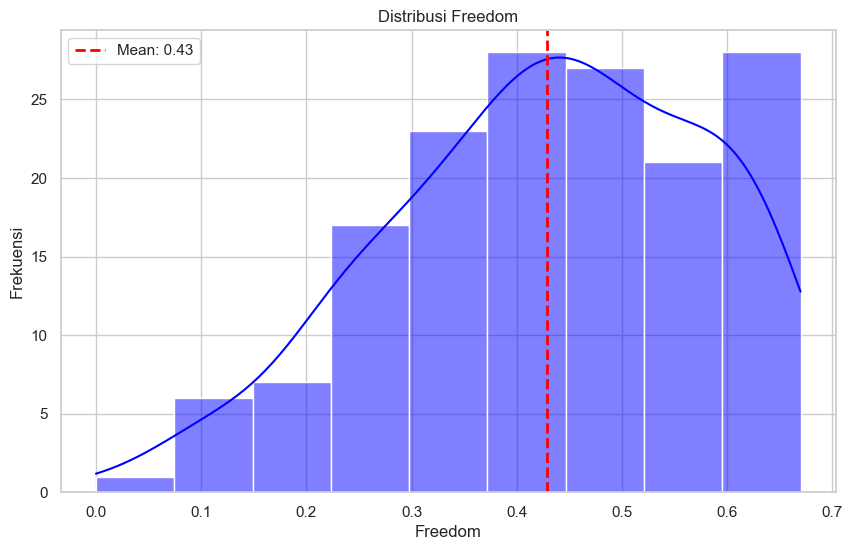

In [28]:
# Membuat plot untuk kolom 'Freedom'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Freedom'], kde=True, color='blue')

# Menambahkan garis rata-rata
mean_freedom = df_2015['Freedom'].mean()
plt.axvline(mean_freedom, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_freedom:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Freedom')
plt.xlabel('Freedom')
plt.ylabel('Frekuensi')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Berdasarkan histogram distribusi *Freedom* yang ditampilkan, kita bisa menyimpulkan bahwasanya puncak histogram dan nilai mean berada pada posisi yang hampir sama, yaitu di sekitar 0,43. Hal ini menunjukkan bahwa sebagian besar nilai dalam data *Freedom* terdistribusi di sekitar angka tersebut. Sementara itu, bentuk histogram juga memberikan insight yang menarik. 

Kita melihat bahwa lengkungan dari sisi kiri menuju puncak menunjukkan kenaikan yang baik, menunjukkan konsentrasi data yang kuat di sisi kiri. Namun, ketika bergerak dari puncak ke kanan, histogram tidak menurun dengan baik, melainkan terlihat mengembang. Ini bisa mengindikasikan bahwa ada beberapa nilai yang lebih tinggi yang memperpanjang distribusi, tetapi tidak dalam jumlah yang signifikan. Artinya, meskipun ada beberapa negara dengan kebebasan yang sangat tinggi, jumlahnya tidak cukup banyak untuk menurunkan frekuensi secara signifikan.

Secara keseluruhan, meskipun histogram menunjukkan konsentrasi yang baik di sekitar nilai mean, keberadaan nilai-nilai tinggi yang tidak terdistribusi dengan baik di sisi kanan memberikan kesan bahwa mungkin terdapat ketidakmerataan dalam data kebebasan antarnegara.

Normal Log-likelihood: 75.32620592345287
Gamma Log-likelihood: 73.795332814245
Exponential Log-likelihood: -24.142977244694656
Weibull Log-likelihood: 79.52987203350958
Log-Normal Log-likelihood: 75.18634494943339
Bimodal Log-likelihood: -1037.0813580407546
Poisson Log-likelihood: -inf
Beta Log-likelihood: 25.53022918797868
Normal AIC: -146.65241184690575
Gamma AIC: -141.59066562849
Exponential AIC: 52.28595448938931
Weibull AIC: -153.05974406701915
Log-Normal AIC: -144.37268989886678
Bimodal AIC: 2082.162716081509
Poisson AIC: inf
Beta AIC: -43.06045837595736


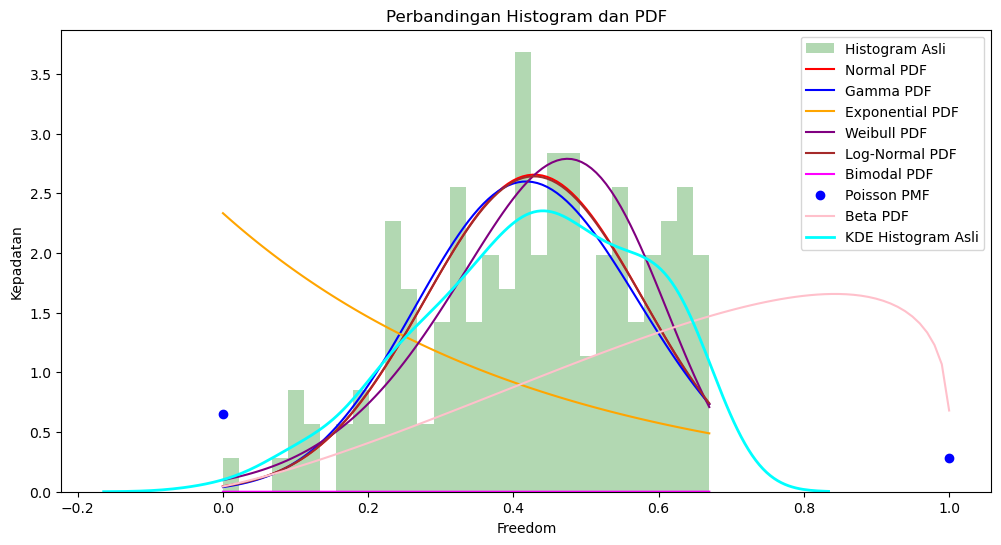

In [78]:
# Definisikan data dari kolom 'Freedom'
data = df_2015['Freedom'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan parameter untuk distribusi bimodal
mean1, std1, weight1 = 2.5, 0.5, 0.5  # Distribusi pertama
mean2, std2, weight2 = 4.5, 0.5, 0.5  # Distribusi kedua

# 7. Fit Distribusi Poisson
lambda_poisson = np.mean(data)  # Rata-rata sebagai parameter λ
poisson_params = (lambda_poisson,)

# 8. Fit Distribusi Beta
# Pastikan data diubah ke dalam rentang [0, 1] untuk Beta
data_beta = (data - min(data)) / (max(data) - min(data))  # Normalisasi ke [0, 1]
beta_params = stats.beta.fit(data_beta)

# 9. Hitung Log-likelihood untuk Distribusi Normal
norm_loglikelihood = np.sum(stats.norm.logpdf(data, *norm_params))

# 10. Hitung Log-likelihood untuk Distribusi Gamma
gamma_loglikelihood = np.sum(stats.gamma.logpdf(data, *gamma_params))

# 11. Hitung Log-likelihood untuk Distribusi Exponential
exp_loglikelihood = np.sum(stats.expon.logpdf(data, *exp_params))

# 12. Hitung Log-likelihood untuk distribusi Weibull
weibull_loglikelihood = np.sum(stats.weibull_min.logpdf(data, *weibull_params))

# 13. Hitung Log-likelihood untuk distribusi Log-Normal
lognorm_loglikelihood = np.sum(stats.lognorm.logpdf(data, *lognorm_params))

# 14. Hitung Log-likelihood untuk distribusi bimodal
bimodal_pdf = (weight1 * stats.norm.pdf(x, mean1, std1) +
                weight2 * stats.norm.pdf(x, mean2, std2))
bimodal_loglikelihood = np.sum(np.log(bimodal_pdf + 1e-10))  # Menghindari log(0)

# 15. Hitung Log-likelihood untuk distribusi Poisson
poisson_loglikelihood = np.sum(stats.poisson.logpmf(data, lambda_poisson))

# 16. Hitung Log-likelihood untuk distribusi Beta
beta_loglikelihood = np.sum(stats.beta.logpdf(data_beta, *beta_params))

# 17. Definisikan Fungsi untuk Menghitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# 18. Hitung AIC untuk Distribusi Normal
norm_aic = calculate_aic(norm_loglikelihood, len(norm_params))

# 19. Hitung AIC untuk Distribusi Gamma
gamma_aic = calculate_aic(gamma_loglikelihood, len(gamma_params))

# 20. Hitung AIC untuk Distribusi Exponential
exp_aic = calculate_aic(exp_loglikelihood, len(exp_params))

# 21. Hitung AIC untuk Distribusi Weibull
weibull_aic = calculate_aic(weibull_loglikelihood, len(weibull_params))

# 22. Hitung AIC untuk Distribusi Log-Normal
lognorm_aic = calculate_aic(lognorm_loglikelihood, len(lognorm_params))

# 23. Hitung AIC untuk distribusi bimodal
bimodal_aic = calculate_aic(bimodal_loglikelihood, 4)  # 4 parameter (mean1, std1, mean2, std2)

# 24. Hitung AIC untuk distribusi Poisson
poisson_aic = calculate_aic(poisson_loglikelihood, 1)  # 1 parameter (λ)

# 25. Hitung AIC untuk distribusi Beta
beta_aic = calculate_aic(beta_loglikelihood, len(beta_params))

# 26. Tampilkan Hasil
print(f"Normal Log-likelihood: {norm_loglikelihood}")
print(f"Gamma Log-likelihood: {gamma_loglikelihood}")
print(f"Exponential Log-likelihood: {exp_loglikelihood}")
print(f"Weibull Log-likelihood: {weibull_loglikelihood}")
print(f"Log-Normal Log-likelihood: {lognorm_loglikelihood}")
print(f"Bimodal Log-likelihood: {bimodal_loglikelihood}")
print(f"Poisson Log-likelihood: {poisson_loglikelihood}")
print(f"Beta Log-likelihood: {beta_loglikelihood}")

print(f"Normal AIC: {norm_aic}")
print(f"Gamma AIC: {gamma_aic}")
print(f"Exponential AIC: {exp_aic}")
print(f"Weibull AIC: {weibull_aic}")
print(f"Log-Normal AIC: {lognorm_aic}")
print(f"Bimodal AIC: {bimodal_aic}")
print(f"Poisson AIC: {poisson_aic}")
print(f"Beta AIC: {beta_aic}")

# 27. Visualisasi PDF
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.3, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi normal
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')

# Plot PDF untuk distribusi gamma
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')

# Plot PDF untuk distribusi Exponential
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')

# Plot PDF untuk distribusi Weibull
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')

# Plot PDF untuk distribusi Log-Normal
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot PDF untuk distribusi bimodal
plt.plot(x, bimodal_pdf, 'magenta', label='Bimodal PDF')

# Plot PDF untuk distribusi Poisson
x_poisson = np.arange(0, max(data)+1)  # Rentang untuk distribusi Poisson
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'blue', marker='o', linestyle='None', label='Poisson PMF')

# Plot PDF untuk distribusi Beta
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, stats.beta.pdf(x_beta, *beta_params), 'pink', label='Beta PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Freedom')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Berdasarkan hasil analisis log-likelihood dan AIC untuk variabel *Freedom*, distribusi **Weibull** adalah yang paling cocok dengan log-likelihood tertinggi (79.53) dan AIC terendah (-153.06). Ini menunjukkan bahwa model Weibull dapat menggambarkan data tentang kebebasan dengan baik, mencerminkan pola distribusi dan variabilitas yang ada. Meskipun distribusi normal dan log-normal juga menunjukkan kecocokan yang baik dengan AIC negatif, distribusi Weibull secara keseluruhan memberikan penjelasan yang lebih baik tentang karakteristik data. Oleh karena itu, model Weibull layak dipertimbangkan untuk analisis lebih lanjut dalam konteks kebebasan.

**g. Trust (Government Corruption)**

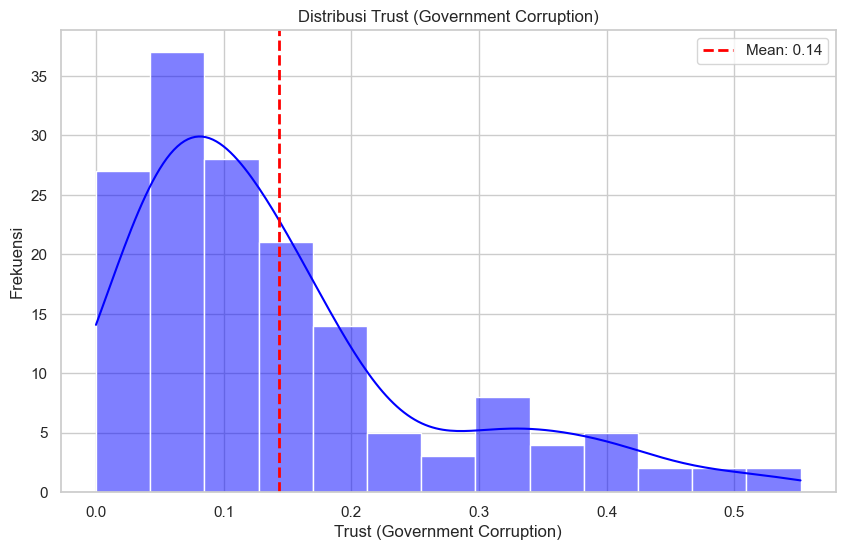

In [30]:
# Membuat plot untuk kolom 'Trust (Government Corruption)'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Trust (Government Corruption)'], kde=True, color='blue')

# Menambahkan garis rata-rata
mean_trust = df_2015['Trust (Government Corruption)'].mean()
plt.axvline(mean_trust, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_trust:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frekuensi')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Distribusi *Trust (Government Corruption)* pada grafik di atas menunjukkan sebagian besar nilai terkonsentrasi di level yang sangat rendah, sekitar 0 hingga 0,1. Distribusi ini menandakan bahwa dalam banyak negara, tingkat kepercayaan terhadap pemerintah terkait korupsi cenderung sangat rendah, tetapi terdapat beberapa negara dengan tingkat kepercayaan yang lebih tinggi meski jumlahnya sedikit. Pola distribusi ini mengindikasikan bahwa kepercayaan terhadap pemerintah bukanlah sesuatu yang merata di seluruh dunia, melainkan lebih banyak negara yang menghadapi masalah kepercayaan rendah, dengan sedikit negara yang memiliki tingkat kepercayaan tinggi.

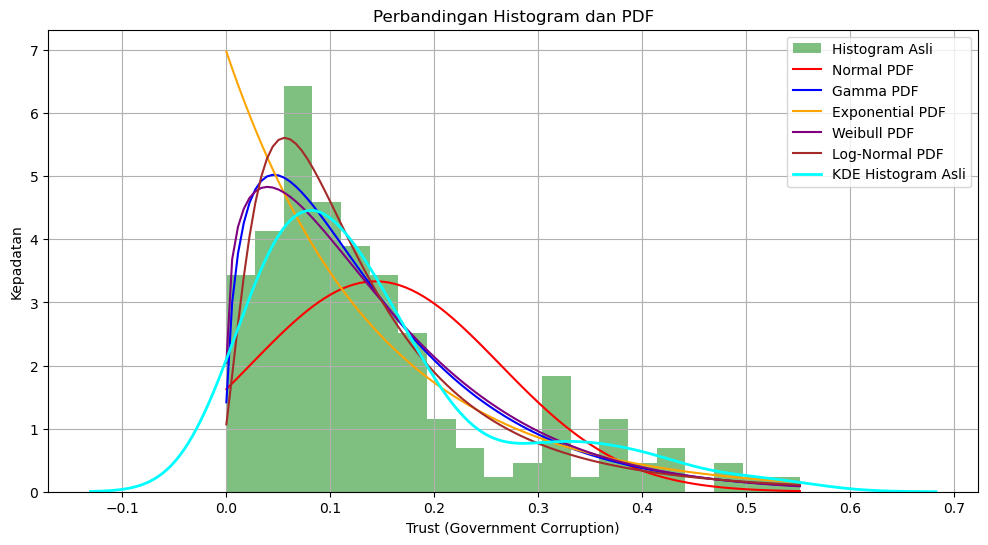

Normal Log-likelihood: 111.26608228826996
Normal AIC: -218.5321645765399
Gamma Log-likelihood: 154.06208203303555
Gamma AIC: -302.1241640660711
Exponential Log-likelihood: 148.83048468312722
Exponential AIC: -293.66096936625445
Weibull Log-likelihood: 153.61943939222067
Weibull AIC: -301.23887878444134
Log-Normal Log-likelihood: 152.98112326152653
Log-Normal AIC: -299.96224652305307


In [79]:
# Definisikan data dari kolom 'Trust (Government Corruption)'
data = df_2015['Trust (Government Corruption)'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan x untuk visualisasi
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=20, density=True, alpha=0.5, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi yang telah di-fit
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

# Tambahkan grid untuk mempermudah pembacaan
plt.grid()
plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

# Hitung Log-likelihood untuk semua distribusi
log_likelihoods = {
    'Normal': np.sum(stats.norm.logpdf(data, *norm_params)),
    'Gamma': np.sum(stats.gamma.logpdf(data, *gamma_params)),
    'Exponential': np.sum(stats.expon.logpdf(data, *exp_params)),
    'Weibull': np.sum(stats.weibull_min.logpdf(data, *weibull_params)),
    'Log-Normal': np.sum(stats.lognorm.logpdf(data, *lognorm_params)),
}

# Hitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# Hitung AIC untuk setiap distribusi
aic_values = {dist: calculate_aic(log_likelihood, len(params)) for dist, (log_likelihood, params) in zip(log_likelihoods.keys(), zip(log_likelihoods.values(), [norm_params, gamma_params, exp_params, weibull_params, lognorm_params]))}

# Tampilkan Hasil
for dist in log_likelihoods.keys():
    print(f"{dist} Log-likelihood: {log_likelihoods[dist]}")
    print(f"{dist} AIC: {aic_values[dist]}")

Berdasarkan hasil analisis log-likelihood dan AIC yang telah dihitung, distribusi **Gamma** memiliki nilai log-likelihood tertinggi yaitu 154.06 dan nilai AIC terendah yaitu -302.12. Ini menunjukkan bahwa distribusi Gamma memberikan model terbaik untuk data *Trust (Government Corruption)* yang dianalisis karena AIC yang lebih rendah mengindikasikan kecocokan model yang lebih baik dengan penalti terhadap kompleksitas model. Sementara itu, distribusi Weibull dan Log-Normal juga menunjukkan kinerja yang baik dengan nilai AIC yang mendekati Gamma. Namun, distribusi Normal dan Exponential memiliki performa yang lebih rendah. Secara keseluruhan, distribusi Gamma adalah yang paling cocok untuk mewakili pola data tersebut, menunjukkan bahwa tingkat kepercayaan terhadap korupsi pemerintah mungkin lebih berpusat pada nilai tertentu dengan beberapa variasi.

 **h. Generosity**

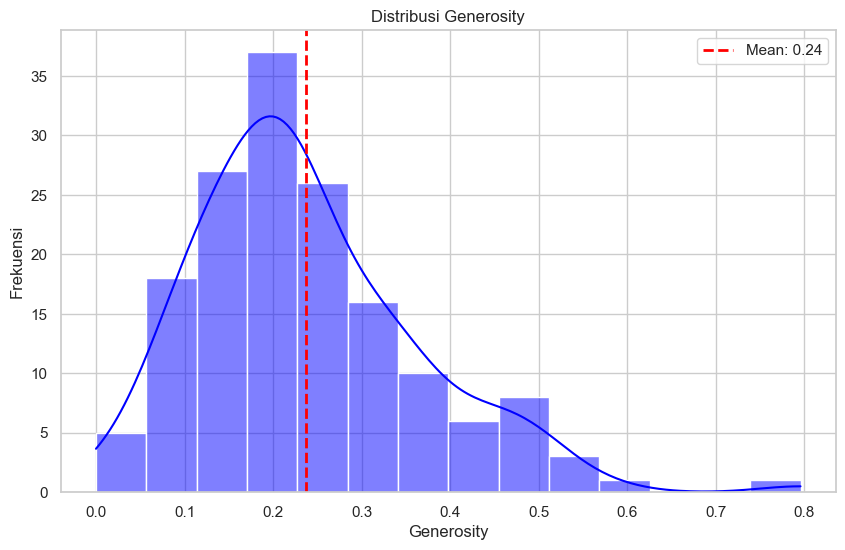

In [29]:
# Membuat plot untuk kolom 'Generosity'
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Generosity'], kde=True, color='blue')

# Menambahkan garis rata-rata
mean_generosity = df_2015['Generosity'].mean()
plt.axvline(mean_generosity, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_generosity:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Generosity')
plt.xlabel('Generosity')
plt.ylabel('Frekuensi')

# Menambahkan keterangan untuk garis rata-rata
plt.legend()

# Menampilkan plot
plt.show()

Distribusi *Generosity* menunjukkan puncak yang terlihat jelas pada sekitar 0,2. Meskipun nilai rata-rata (mean) dari 'Generosity' tercatat di 0,237, puncak grafik yang jatuh di 0,2 menunjukkan bahwa sebagian besar nilai berkumpul di sekitar angka tersebut. Ini mengindikasikan bahwa banyak negara memiliki tingkat kedermawanan yang relatif rendah, dan hanya sedikit negara yang menunjukkan tingkat kedermawanan yang lebih tinggi. Dengan kata lain, meskipun rata-rata 'Generosity' berada sedikit di atas 0,2, distribusi menunjukkan bahwa data ini cenderung terdistribusi secara asimetris ke arah nilai yang lebih rendah, menciptakan puncak yang lebih tajam. Hal ini juga bisa menjadi indikasi bahwa faktor-faktor yang mempengaruhi kedermawanan di berbagai negara sangat bervariasi, dan mungkin ada sejumlah negara yang jauh lebih dermawan, tetapi tidak cukup untuk menggeser puncak distribusi secara signifikan.

C:\Users\Difta Alzena\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Difta Alzena\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Normal Log-likelihood: 102.7455340221492
Gamma Log-likelihood: 114.1553251519091
Exponential Log-likelihood: 69.27495027697326
Weibull Log-likelihood: -inf
Log-Normal Log-likelihood: 114.44841951333984
Bimodal Log-likelihood: -986.3945515963679
Poisson Log-likelihood: -inf
Beta Log-likelihood: 78.08144321227957
Normal AIC: -201.4910680442984
Gamma AIC: -222.3106503038182
Exponential AIC: -134.54990055394651
Weibull AIC: inf
Log-Normal AIC: -222.8968390266797
Bimodal AIC: 1980.7891031927359
Poisson AIC: inf
Beta AIC: -148.16288642455913


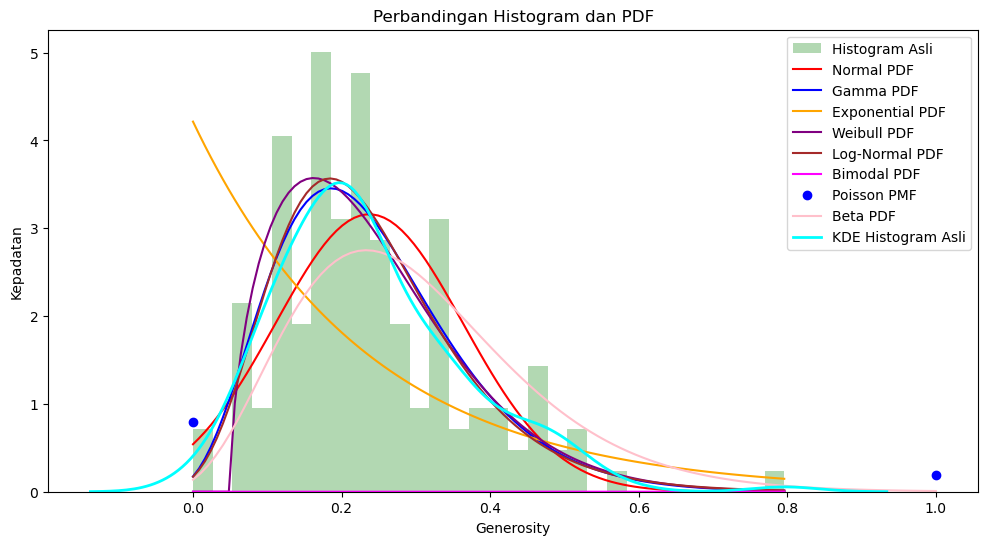

In [85]:
# Definisikan data dari kolom 'Generosity'
data = df_2015['Generosity'].dropna()

# 1. Fit Distribusi Normal
norm_params = stats.norm.fit(data)

# 2. Fit Distribusi Gamma
gamma_params = stats.gamma.fit(data)

# 3. Fit Distribusi Exponential
exp_params = stats.expon.fit(data)

# 4. Fit Distribusi Weibull
weibull_params = stats.weibull_min.fit(data)

# 5. Fit Distribusi Log-Normal
lognorm_params = stats.lognorm.fit(data)

# 6. Definisikan parameter untuk distribusi bimodal
mean1, std1, weight1 = 2.5, 0.5, 0.5  # Distribusi pertama
mean2, std2, weight2 = 4.5, 0.5, 0.5  # Distribusi kedua

# 7. Fit Distribusi Poisson
lambda_poisson = np.mean(data)  # Rata-rata sebagai parameter λ
poisson_params = (lambda_poisson,)

# 8. Fit Distribusi Beta
# Pastikan data diubah ke dalam rentang [0, 1] untuk Beta
data_beta = (data - min(data)) / (max(data) - min(data))  # Normalisasi ke [0, 1]
beta_params = stats.beta.fit(data_beta)

# 9. Hitung Log-likelihood untuk Distribusi Normal
norm_loglikelihood = np.sum(stats.norm.logpdf(data, *norm_params))

# 10. Hitung Log-likelihood untuk Distribusi Gamma
gamma_loglikelihood = np.sum(stats.gamma.logpdf(data, *gamma_params))

# 11. Hitung Log-likelihood untuk Distribusi Exponential
exp_loglikelihood = np.sum(stats.expon.logpdf(data, *exp_params))

# 12. Hitung Log-likelihood untuk distribusi Weibull
weibull_loglikelihood = np.sum(stats.weibull_min.logpdf(data, *weibull_params))

# 13. Hitung Log-likelihood untuk distribusi Log-Normal
lognorm_loglikelihood = np.sum(stats.lognorm.logpdf(data, *lognorm_params))

# 14. Hitung Log-likelihood untuk distribusi bimodal
bimodal_pdf = (weight1 * stats.norm.pdf(x, mean1, std1) +
                weight2 * stats.norm.pdf(x, mean2, std2))
bimodal_loglikelihood = np.sum(np.log(bimodal_pdf + 1e-10))  # Menghindari log(0)

# 15. Hitung Log-likelihood untuk distribusi Poisson
poisson_loglikelihood = np.sum(stats.poisson.logpmf(data, lambda_poisson))

# 16. Hitung Log-likelihood untuk distribusi Beta
beta_loglikelihood = np.sum(stats.beta.logpdf(data_beta, *beta_params))

# 17. Definisikan Fungsi untuk Menghitung AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# 18. Hitung AIC untuk Distribusi Normal
norm_aic = calculate_aic(norm_loglikelihood, len(norm_params))

# 19. Hitung AIC untuk Distribusi Gamma
gamma_aic = calculate_aic(gamma_loglikelihood, len(gamma_params))

# 20. Hitung AIC untuk Distribusi Exponential
exp_aic = calculate_aic(exp_loglikelihood, len(exp_params))

# 21. Hitung AIC untuk Distribusi Weibull
weibull_aic = calculate_aic(weibull_loglikelihood, len(weibull_params))

# 22. Hitung AIC untuk Distribusi Log-Normal
lognorm_aic = calculate_aic(lognorm_loglikelihood, len(lognorm_params))

# 23. Hitung AIC untuk distribusi bimodal
bimodal_aic = calculate_aic(bimodal_loglikelihood, 4)  # 4 parameter (mean1, std1, mean2, std2)

# 24. Hitung AIC untuk distribusi Poisson
poisson_aic = calculate_aic(poisson_loglikelihood, 1)  # 1 parameter (λ)

# 25. Hitung AIC untuk distribusi Beta
beta_aic = calculate_aic(beta_loglikelihood, len(beta_params))

# 26. Tampilkan Hasil
print(f"Normal Log-likelihood: {norm_loglikelihood}")
print(f"Gamma Log-likelihood: {gamma_loglikelihood}")
print(f"Exponential Log-likelihood: {exp_loglikelihood}")
print(f"Weibull Log-likelihood: {weibull_loglikelihood}")
print(f"Log-Normal Log-likelihood: {lognorm_loglikelihood}")
print(f"Bimodal Log-likelihood: {bimodal_loglikelihood}")
print(f"Poisson Log-likelihood: {poisson_loglikelihood}")
print(f"Beta Log-likelihood: {beta_loglikelihood}")

print(f"Normal AIC: {norm_aic}")
print(f"Gamma AIC: {gamma_aic}")
print(f"Exponential AIC: {exp_aic}")
print(f"Weibull AIC: {weibull_aic}")
print(f"Log-Normal AIC: {lognorm_aic}")
print(f"Bimodal AIC: {bimodal_aic}")
print(f"Poisson AIC: {poisson_aic}")
print(f"Beta AIC: {beta_aic}")

# 27. Visualisasi PDF
x = np.linspace(min(data), max(data), 100)

# Plot histogram data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.3, color='g', label='Histogram Asli')

# Plot PDF untuk distribusi normal
plt.plot(x, stats.norm.pdf(x, *norm_params), 'r-', label='Normal PDF')

# Plot PDF untuk distribusi gamma
plt.plot(x, stats.gamma.pdf(x, *gamma_params), 'b-', label='Gamma PDF')

# Plot PDF untuk distribusi Exponential
plt.plot(x, stats.expon.pdf(x, *exp_params), 'orange', label='Exponential PDF')

# Plot PDF untuk distribusi Weibull
plt.plot(x, stats.weibull_min.pdf(x, *weibull_params), 'purple', label='Weibull PDF')

# Plot PDF untuk distribusi Log-Normal
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), 'brown', label='Log-Normal PDF')

# Plot PDF untuk distribusi bimodal
plt.plot(x, bimodal_pdf, 'magenta', label='Bimodal PDF')

# Plot PDF untuk distribusi Poisson
x_poisson = np.arange(0, max(data)+1)  # Rentang untuk distribusi Poisson
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'blue', marker='o', linestyle='None', label='Poisson PMF')

# Plot PDF untuk distribusi Beta
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, stats.beta.pdf(x_beta, *beta_params), 'pink', label='Beta PDF')

# Plot KDE untuk histogram asli
sns.kdeplot(data, color='cyan', label='KDE Histogram Asli', linewidth=2)

plt.title('Perbandingan Histogram dan PDF')
plt.xlabel('Generosity')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Berdasarkan hasil analisis log-likelihood dan AIC untuk variabel *Generosity*, distribusi **Log-Normal** menunjukkan nilai log-likelihood tertinggi yaitu 114.45 dan nilai AIC terendah yaitu -222.90, menjadikannya model yang paling cocok untuk data ini. Distribusi Gamma juga menunjukkan performa yang baik dengan nilai log-likelihood 114.16 dan AIC -222.31, tetapi sedikit di bawah Log-Normal. Model Normal dan Beta memiliki nilai AIC yang lebih tinggi, sedangkan distribusi Bimodal dan Poisson tidak dapat diandalkan karena menghasilkan nilai log-likelihood negatif tak terhingga. Dengan demikian, distribusi Log-Normal tidak hanya menjelaskan pola distribusi data dengan baik, tetapi juga memberikan pemodelan yang lebih sesuai untuk memahami tingkat kedermawanan dalam populasi yang dianalisis, yang menunjukkan adanya kecenderungan distribusi yang lebih kompleks dan bervariasi.

### 2. Pemusatan Data (Mean, Median, Mode)

#### Pemusatan Data Happiness Score:

In [5]:
# Menghitung pemusatan data
mean = df_2015['Happiness Score'].mean()
median = df_2015['Happiness Score'].median()
modus = df_2015['Happiness Score'].mode()

# Mencetak hasil
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Modus: {modus}")

Mean: 5.375734177215189
Median: 5.2325
Modus: 0    5.192
Name: Happiness Score, dtype: float64


**Penjelasan**:  
- **Mean**: Rata-rata dari data ini adalah **5.3757**. Ini menunjukkan bahwa secara keseluruhan, individu-individu dalam populasi ini merasa cukup bahagia. Rata-rata ini dapat dibilang menggambarkan berbagai faktor, seperti pendapatan, dukungan sosial, dan kesehatan, yang berkontribusi pada kebahagiaan mereka. Dengan kata lain, banyak orang merasa cukup puas dengan kehidupan mereka di negara tersebut.
--- 
- **Median**: Nilai tengah dari data ini adalah **5.2325**. Ini menunjukkan setengah dari individu berada di bawah nilai ini, dan setengah lainnya berada di atas nilai ini. Median ini memberikan gambaran yang lebih seimbang tentang kebahagiaan, terutama ketika ada data yang mungkin aneh atau berbeda. Artinya, tidak ada kelompok yang mendominasi dengan skor sangat rendah atau sangat tinggi sehingga ada keseimbangan dalam hal itu.
--- 
- **Mode**: Modus dari data ini adalah **5.192**. Ini menunjukkan skor yang paling sering muncul dalam data. Di sini, angka **0** yang muncul di depan **5.192** itu sebenarnya adalah indeks dari nilai modus dalam Series atau DataFrame, jadi bisa kita abaikan. Mode atau modus ini menunjukkan bahwa banyak orang mengalami tingkat kebahagiaan yang mirip, yang mengisyaratkan bahwa ada beberapa faktor yang membuat masyarakat ini merasa bahagia secara kolektif.


#### Pemusatan Data Setiap Kolom yang Menjadi Faktor Happiness Score:

In [87]:
import pandas as pd

# Menghitung pemusatan data untuk setiap kolom yang menjadi faktor happiness score di setiap negara
columns_to_analyze = [
    'Economy (GDP per Capita)', 
    'Family', 
    'Health (Life Expectancy)', 
    'Freedom', 
    'Trust (Government Corruption)', 
    'Generosity'
]

# Menampilkan hasil
for column in columns_to_analyze:
    mean = df_2015[column].mean()
    median = df_2015[column].median()
    modus = df_2015[column].mode()[0]  # Mengambil nilai modus pertama
    
    print(f"Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {modus:.3f}")
    print("------------------------------")

Kolom: Economy (GDP per Capita)
Mean: 0.846
Median: 0.910
Modus: 0.000
------------------------------
Kolom: Family
Mean: 0.991
Median: 1.030
Modus: 0.000
------------------------------
Kolom: Health (Life Expectancy)
Mean: 0.630
Median: 0.697
Modus: 0.924
------------------------------
Kolom: Freedom
Mean: 0.429
Median: 0.436
Modus: 0.000
------------------------------
Kolom: Trust (Government Corruption)
Mean: 0.143
Median: 0.107
Modus: 0.325
------------------------------
Kolom: Generosity
Mean: 0.237
Median: 0.216
Modus: 0.000
------------------------------


**Penjelasan**:  

**Economy (GDP per Capita)**
- **Mean**: Rata-rata GDP per kapita adalah **0,846**, mencerminkan tingkat ekonomi yang cukup baik di banyak negara.
- **Median**: Nilai tengah GDP per kapita adalah **0,910**, menunjukkan distribusi yang lebih stabil di antara negara.
- **Mode**: Modus adalah **0,000**, yang berarti banyak negara memiliki nilai unik dalam skor GDP mereka sehingga angka nol muncul sebagai yang paling sering. 
---
**Family**
- **Mean**: Rata-rata indikator keluarga adalah **0,991**, menunjukkan dukungan keluarga yang baik.
- **Median**: Nilai tengah adalah **1,030**, mengindikasikan banyak negara memiliki dukungan keluarga yang lebih tinggi.
- **Mode**: Modus **0,000** menandakan bahwa skor untuk dukungan keluarga unik, dengan sedikit negara memiliki nilai serupa.
---
**Health (Life Expectancy)**
- **Mean**: Rata-rata harapan hidup adalah **0,630**, menunjukkan kesehatan yang cukup baik secara keseluruhan.
- **Median**: Nilai tengah **0,697** memberikan gambaran seimbang tentang harapan hidup.
- **Mode**: Modus **0,924** menunjukkan bahwa sejumlah negara memiliki beberapa harapan hidup yang tinggi di nilai ini.
---
**Freedom**
- **Mean**: Rata-rata kebebasan adalah **0,429**, menunjukkan adanya batasan dalam kebebasan individu.
- **Median**: Nilai tengah **0,436** menunjukkan variasi dalam tingkat kebebasan antar negara.
- **Mode**: Modus **0,000** mengindikasikan bahwa banyak skor unik menandai rendahnya kebebasan di negara-negara tersebut.
---
**Trust (Government Corruption)**
- **Mean**: Rata-rata kepercayaan adalah **0,143**, mencerminkan rendahnya kepercayaan terhadap pemerintah.
- **Median**: Nilai tengah **0,107** menunjukkan kepercayaan yang cenderung rendah di banyak negara.
- **Mode**: Modus **0,325** menunjukkan beberapa negara memiliki kepercayaan lebih tinggi di nilai ini, tetapi skor unik tetap mendominasi.
---
**Generosity**
- **Mean**: Rata-rata dermawan adalah **0,237**, menunjukkan tingkat kedermawanan yang relatif rendah.
- **Median**: Nilai tengah **0,216** menunjukkan bahwa banyak negara memiliki nilai kedermawanan yang rendah.
- **Mode**: Modus **0,000** menunjukkan bahwa setiap individu memiliki skor unik untuk kedermawanan sehingga tidak ada nilai yang sering muncul.

### 3. Penyebaran Data (Variance, Standard Deviation, Range)

#### Penyebaran Data Happiness Score:

In [7]:
# Menghitung penyebaran Data
range = df_2015['Happiness Score'].max() - df_2015['Happiness Score'].min()
var = df_2015['Happiness Score'].var()
std_dev = df_2015['Happiness Score'].std()

# Mencetak hasil
print(f"Range: {range}")
print(f"Variance: {var}")
print(f"Standard Deviation: {std_dev}")

Range: 4.747999999999999
Variance: 1.3110482091429494
Standard Deviation: 1.1450101349520665


**Penjelasan**:  
- **Range**: Jarak antara nilai maksimum dan minimum dalam skor kebahagiaan adalah **4.748**. Angka **4.748** dapat dianggap cukup besar, terutama jika kita mempertimbangkan bahwa skala kebahagiaan yang diukur berkisar dari **0** hingga **10**. Rentang ini mengindikasikan adanya variasi yang luas dalam pengalaman kebahagiaan di antara individu. Dengan adanya range yang besar, kita bisa melihat bahwa beberapa orang mungkin merasa sangat bahagia dan puas dengan hidup mereka, sementara yang lain mungkin merasa jauh lebih tidak bahagia. Ini menciptakan suatu gambaran di mana tingkat kesejahteraan tidak merata di antara populasi dalam suatu negara.
--- 
- **Variance**: Variansi sebesar **1.311** menunjukkan tingkat penyebaran yang cukup signifikan dalam nilai kebahagiaan individu dalam populasi ini. Angka ini mencerminkan seberapa jauh skor kebahagiaan menyimpang dari rata-rata **5.375**. Variansi yang tinggi ini mengindikasikan bahwa ada variasi yang besar dalam pengalaman kebahagiaan di antara individu, artinya tidak semua orang merasakan tingkat kebahagiaan yang serupa. Dengan kata lain, ada individu yang sangat bahagia, sementara yang lain mungkin merasa kurang bahagia, menandakan adanya kesenjangan dalam kesejahteraan.
--- 
- **Standard Deviation**: Standar deviasi sebesar **1.145** menunjukkan seberapa besar variasi atau penyebaran nilai dalam dataset kebahagiaan ini dibandingkan dengan rata-rata. Dengan rentang nilai kebahagiaan yang diukur dari **0 hingga 10**, dan rata-rata kebahagiaan yang tercatat sebesar **5.375**, kita dapat menghitung rentang skor kebahagiaan di mana sebagian besar individu berada, yaitu antara **4.23** (5.375 - 1.145) dan **6.52** (5.375 + 1.145). Ini menunjukkan bahwa sebagian besar individu cenderung memiliki tingkat kebahagiaan yang tidak jauh dari rata-rata, tetapi juga mengindikasikan adanya individu yang merasa jauh lebih bahagia (di atas **6.52**) atau kurang bahagia (di bawah **4.23**). Nilai standar deviasi ini mencerminkan keragaman yang cukup besar dalam pengalaman kebahagiaan, menandakan bahwa meskipun rata-rata menunjukkan kondisi yang baik, terdapat variasi signifikan dalam persepsi kebahagiaan di antara individu. Oleh karena itu, sangat penting bagi negara-negara dengan skor kebahagiaan lebih rendah untuk memahami dan memperhatikan kondisi masyarakatnya, agar upaya peningkatan kesejahteraan dapat dilakukan secara menyeluruh dan tepat sasaran.


#### Penyebaran Data Setiap Kolom yang Menjadi Faktor Happiness Score di Setiap Negara:

In [62]:
# Daftar kolom yang ingin dihitung
columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Menghitung penyebaran data untuk setiap kolom
for column in columns:
    range_value = df_2015[column].max() - df_2015[column].min()
    variance_value = df_2015[column].var()
    std_dev_value = df_2015[column].std()
    
    # Mencetak hasil
    print(f"Kolom: {column}")
    print(f"Range: {range_value:.4f}")
    print(f"Variance: {variance_value:.4f}")
    print(f"Standard Deviation: {std_dev_value:.4f}")
    print("------------------------------")

Kolom: Economy (GDP per Capita)
Range: 1.6904
Variance: 0.1625
Standard Deviation: 0.4031
------------------------------
Kolom: Family
Range: 1.4022
Variance: 0.0742
Standard Deviation: 0.2724
------------------------------
Kolom: Health (Life Expectancy)
Range: 1.0252
Variance: 0.0610
Standard Deviation: 0.2471
------------------------------
Kolom: Freedom
Range: 0.6697
Variance: 0.0227
Standard Deviation: 0.1507
------------------------------
Kolom: Trust (Government Corruption)
Range: 0.5519
Variance: 0.0144
Standard Deviation: 0.1200
------------------------------
Kolom: Generosity
Range: 0.7959
Variance: 0.0160
Standard Deviation: 0.1267
------------------------------


**Penjelasan:**

**Economy (GDP per Capita)**:  
- **Range**: Rentang nilai **1.6904** menunjukkan perbedaan yang cukup signifikan dalam GDP per kapita antar negara. 
- **Variance**: Varians **0.1625** mengindikasikan bahwa nilai GDP per kapita bervariasi secara moderat di seluruh dataset. 
- **Standard Deviation**: Deviasi standar **0.4031** menunjukkan bahwa sebagian besar nilai GDP per kapita berada dalam jarak **0.4031** dari rata-rata.

---

**Family**:  
- **Range**: Rentang **1.4022** menunjukkan adanya variasi yang cukup baik dalam skor yang diberikan pada aspek keluarga. 
- **Variance**: Varians **0.0742** menunjukkan variasi yang lebih kecil dibandingkan kolom lainnya. 
- **Standard Deviation**: Deviasi standar **0.2724** menunjukkan bahwa skor sebagian besar berada dalam jarak yang relatif dekat dari rata-rata.

---

**Health (Life Expectancy)**:  
- **Range**: Rentang **1.0252** menunjukkan adanya perbedaan yang signifikan dalam harapan hidup antar negara. 
- **Variance**: Varians **0.0610** menunjukkan variasi yang lebih rendah, menunjukkan bahwa data lebih terkonsentrasi. 
- **Standard Deviation**: Deviasi standar **0.2471** menunjukkan bahwa nilai harapan hidup juga relatif dekat dengan rata-rata.

---

**Freedom**:  
- **Range**: Rentang **0.6697** menunjukkan variasi dalam tingkat kebebasan yang dirasakan. 
- **Variance**: Varians **0.0227** menunjukkan variasi yang sangat kecil, mencerminkan kesamaan dalam persepsi kebebasan antarindividu. 
- **Standard Deviation**: Deviasi standar **0.1507** menunjukkan konsistensi yang cukup tinggi di sekitar rata-rata.

---

**Trust (Government Corruption)**:  
- **Range**: Rentang **0.5519** menunjukkan adanya perbedaan dalam tingkat kepercayaan terhadap pemerintah di berbagai negara. 
- **Variance**: Varians **0.0144** menunjukkan variasi yang sangat kecil, menunjukkan bahwa data cukup terpusat. 
- **Standard Deviation**: Deviasi standar **0.1200** menunjukkan tingkat konsistensi yang cukup baik dalam nilai yang diberikan.

---

**Generosity**:  
- **Range**: Rentang **0.7959** menunjukkan perbedaan dalam tingkat kemurahan hati antarnegara. 
- **Variance**: Varians **0.0160** menunjukkan variasi yang cukup kecil, menunjukkan bahwa nilai kemurahan hati cenderung homogen. 
- **Standard Deviation**: Deviasi standar **0.1267** menunjukkan bahwa nilai-nilai kemurahan hati cukup konsisten di sekitar rata-rata.

---

Secara keseluruhan, kolom **Economy** menunjukkan variasi yang paling tinggi, sedangkan kolom **Freedom** dan **Trust (Government Corruption)** menunjukkan variasi yang sangat rendah. Ini menggambarkan perbedaan tingkat kesejahteraan dan kualitas hidup di berbagai negara yang cukup signifikan, meskipun ada juga beberapa aspek yang lebih terpusat.

### 4. Analisis Skewness

#### Analisis Skewness Happiness Score:

In [10]:
# Menghitung skewness
skewness = df_2015['Happiness Score'].skew()

# Mencetak hasil
print(f"Skewness: {skewness}")

Skewness: 0.09776909409344678


Dari analisis grafik histogram sebelumnya, terlihat bahwa data kebahagiaan condong sedikit lebih banyak ke arah kanan, yang berarti ada lebih banyak individu dengan skor kebahagiaan di atas rata-rata, meskipun perbedaan ini tidak terlalu signifikan. Hasil analisis skewness ini menunjukkan nilai **0.0978**, yang artinya mendukung analisis sebelumnya, juga memberikan gambaran positif tentang kesejahteraan individu dalam populasi yang dianalisis. Meskipun distribusi tidak sepenuhnya simetris, kecenderungan ke arah kanan ini menunjukkan bahwa banyak orang merasa cukup bahagia dengan hidup mereka, dan ada sejumlah individu yang merasa sangat bahagia.

#### Analisis Skewness Setiap Kolom yang Menjadi Faktor Happiness Score di Setiap Negara:

In [63]:
# Menghitung skewness untuk setiap kolom yang diinginkan
columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

for column in columns:
    skewness = df_2015[column].skew()
    print(f"Kolom: {column}")
    print(f"Skewness: {skewness}")
    
    # Analisis skewness
    if skewness > 0:
        print("Data terdistribusi positif (right-skewed), artinya ada lebih banyak nilai rendah dan beberapa nilai tinggi.")
    elif skewness < 0:
        print("Data terdistribusi negatif (left-skewed), artinya ada lebih banyak nilai tinggi dan beberapa nilai rendah.")
    else:
        print("Data terdistribusi simetris (normal).")
    
    print("------------------------------")

Kolom: Economy (GDP per Capita)
Skewness: -0.3175746523312048
Data terdistribusi negatif (left-skewed), artinya ada lebih banyak nilai tinggi dan beberapa nilai rendah.
------------------------------
Kolom: Family
Skewness: -1.0068931265421133
Data terdistribusi negatif (left-skewed), artinya ada lebih banyak nilai tinggi dan beberapa nilai rendah.
------------------------------
Kolom: Health (Life Expectancy)
Skewness: -0.7053284856924459
Data terdistribusi negatif (left-skewed), artinya ada lebih banyak nilai tinggi dan beberapa nilai rendah.
------------------------------
Kolom: Freedom
Skewness: -0.41346197289710274
Data terdistribusi negatif (left-skewed), artinya ada lebih banyak nilai tinggi dan beberapa nilai rendah.
------------------------------
Kolom: Trust (Government Corruption)
Skewness: 1.3854625954673152
Data terdistribusi positif (right-skewed), artinya ada lebih banyak nilai rendah dan beberapa nilai tinggi.
------------------------------
Kolom: Generosity
Skewness: 1

**Penjelasan:**

- **Economy (GDP per Capita)**

  **Skewness**: -0.32  
  Data terdistribusi negatif (left-skewed), yang menunjukkan bahwa terdapat lebih banyak nilai tinggi di dalam dataset ini. Sebagian besar individu memiliki nilai GDP per kapita yang lebih tinggi, tetapi ada beberapa individu dengan nilai yang jauh lebih rendah.
---
- **Family**  
  **Skewness**: -1.01  
  Data terdistribusi negatif (left-skewed), artinya banyak individu memiliki skor tinggi untuk faktor keluarga. Namun, terdapat sejumlah kecil individu yang memiliki nilai yang lebih rendah, menunjukkan bahwa sebagian besar populasi merasa puas dengan dukungan keluarga mereka.
---
- **Health (Life Expectancy)**  
  **Skewness**: -0.71  
  Data terdistribusi negatif (left-skewed), yang menunjukkan bahwa sebagian besar individu memiliki harapan hidup yang relatif tinggi, dengan beberapa individu di sisi rendah. Hal ini mencerminkan kesejahteraan kesehatan yang lebih baik di populasi.
---
- **Freedom**  
  **Skewness**: -0.41  
  Data terdistribusi negatif (left-skewed), menunjukkan bahwa mayoritas individu merasa memiliki kebebasan yang cukup baik, meskipun ada beberapa yang mungkin merasa lebih terbatas dalam kebebasan mereka.
---
- **Trust (Government Corruption)**  
  **Skewness**: 1.39  
  Data terdistribusi positif (right-skewed), artinya terdapat lebih banyak nilai rendah terkait kepercayaan terhadap pemerintah. Ini menunjukkan bahwa banyak individu merasa skeptis atau tidak percaya terhadap integritas pemerintah, dengan beberapa individu yang menunjukkan tingkat kepercayaan yang lebih tinggi.
---
- **Generosity**  
  **Skewness**: 1.00  
  Data terdistribusi positif (right-skewed), yang menunjukkan bahwa mayoritas individu memberikan nilai rendah pada faktor kedermawanan. Ini menunjukkan bahwa meskipun ada individu yang sangat dermawan, banyak yang tidak memberikan sumbangan atau dukungan yang signifikan.